In [23]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
OA_patients = pd.read_csv("OA_patient.csv")

In [25]:
OA_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          711 non-null    int64  
 1   SEQN                                711 non-null    int64  
 2   Doctor ever said you had arthritis  711 non-null    int64  
 3   Age when told you had arthritis     700 non-null    float64
 4   Which type of arthritis was it?     711 non-null    float64
 5   Gender                              711 non-null    int64  
 6   Age in years at screening           711 non-null    int64  
 7   Race/Hispanic origin w/ NH Asian    711 non-null    int64  
 8   Education level - Adults 20+        711 non-null    int64  
 9   Ratio of family income to poverty   614 non-null    float64
 10  Body Mass Index (kg/m**2)           649 non-null    float64
 11  Waist Circumference (cm)            614 non-n

# Eliminate observation with Age < 20

In [26]:
OA_patients = OA_patients[(OA_patients['Age when told you had arthritis'] >= 20 )]

In [27]:
OA_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 710
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          682 non-null    int64  
 1   SEQN                                682 non-null    int64  
 2   Doctor ever said you had arthritis  682 non-null    int64  
 3   Age when told you had arthritis     682 non-null    float64
 4   Which type of arthritis was it?     682 non-null    float64
 5   Gender                              682 non-null    int64  
 6   Age in years at screening           682 non-null    int64  
 7   Race/Hispanic origin w/ NH Asian    682 non-null    int64  
 8   Education level - Adults 20+        682 non-null    int64  
 9   Ratio of family income to poverty   592 non-null    float64
 10  Body Mass Index (kg/m**2)           622 non-null    float64
 11  Waist Circumference (cm)            589 non-null  

In [28]:
OA_patients = OA_patients[(OA_patients['Age in years at screening'] >= 20 )]

In [29]:
OA_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 710
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          682 non-null    int64  
 1   SEQN                                682 non-null    int64  
 2   Doctor ever said you had arthritis  682 non-null    int64  
 3   Age when told you had arthritis     682 non-null    float64
 4   Which type of arthritis was it?     682 non-null    float64
 5   Gender                              682 non-null    int64  
 6   Age in years at screening           682 non-null    int64  
 7   Race/Hispanic origin w/ NH Asian    682 non-null    int64  
 8   Education level - Adults 20+        682 non-null    int64  
 9   Ratio of family income to poverty   592 non-null    float64
 10  Body Mass Index (kg/m**2)           622 non-null    float64
 11  Waist Circumference (cm)            589 non-null  

# Descriptive statistics of Age

In [30]:
OA_patients['Age when told you had arthritis'].describe()

count    682.000000
mean      51.151026
std       14.157777
min       20.000000
25%       40.000000
50%       50.500000
75%       60.000000
max       80.000000
Name: Age when told you had arthritis, dtype: float64

In [31]:
OA_patients['Age in years at screening'].describe()

count    682.000000
mean      64.664223
std       12.607838
min       23.000000
25%       56.000000
50%       66.000000
75%       76.000000
max       80.000000
Name: Age in years at screening, dtype: float64

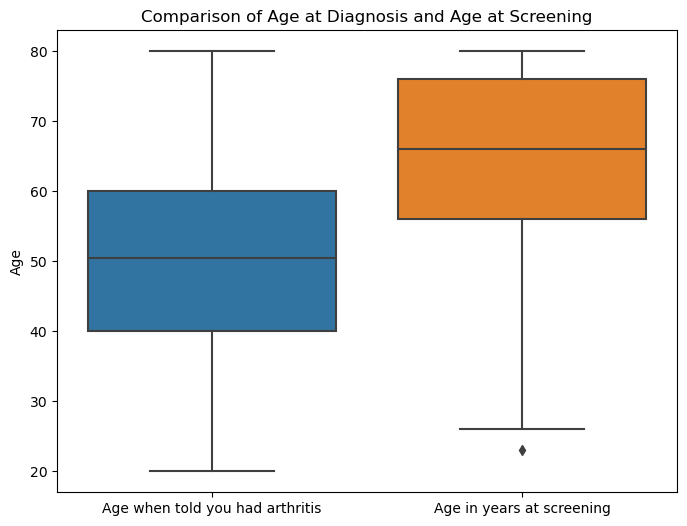

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=OA_patients[['Age when told you had arthritis', 'Age in years at screening']])
plt.title('Comparison of Age at Diagnosis and Age at Screening')
plt.ylabel('Age')
plt.show()

# Early onset of OA: cutoff value = 50

In [33]:
def dichotomous_OA_age(i):
    if i < 50:
        return "1"
    else: 
        return "0"
    
OA_patients['Early Onset of OA'] = OA_patients['Age when told you had arthritis'].apply(dichotomous_OA_age)

In [34]:
OA_patients['Early Onset of OA'].value_counts()

Early Onset of OA
0    405
1    277
Name: count, dtype: int64

In [35]:
OA_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 0 to 710
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          682 non-null    int64  
 1   SEQN                                682 non-null    int64  
 2   Doctor ever said you had arthritis  682 non-null    int64  
 3   Age when told you had arthritis     682 non-null    float64
 4   Which type of arthritis was it?     682 non-null    float64
 5   Gender                              682 non-null    int64  
 6   Age in years at screening           682 non-null    int64  
 7   Race/Hispanic origin w/ NH Asian    682 non-null    int64  
 8   Education level - Adults 20+        682 non-null    int64  
 9   Ratio of family income to poverty   592 non-null    float64
 10  Body Mass Index (kg/m**2)           622 non-null    float64
 11  Waist Circumference (cm)            589 non-null  

# Drop observations with NA value

In [36]:
OA_patients.drop(columns = {'Unnamed: 0'},inplace=True)

In [37]:
OA_patients.dropna(inplace=True)

In [38]:
OA_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 0 to 710
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SEQN                                502 non-null    int64  
 1   Doctor ever said you had arthritis  502 non-null    int64  
 2   Age when told you had arthritis     502 non-null    float64
 3   Which type of arthritis was it?     502 non-null    float64
 4   Gender                              502 non-null    int64  
 5   Age in years at screening           502 non-null    int64  
 6   Race/Hispanic origin w/ NH Asian    502 non-null    int64  
 7   Education level - Adults 20+        502 non-null    int64  
 8   Ratio of family income to poverty   502 non-null    float64
 9   Body Mass Index (kg/m**2)           502 non-null    float64
 10  Waist Circumference (cm)            502 non-null    float64
 11  Vitamin D Level (nmol/L)            502 non-null  

# Polychotomous variables

In [39]:
#Ratio of family income to povery
def dichotomous_poverty_ratio(i):
    if i < 1:
        return '1' #"Poor" 
    elif 1 <= i < 2:
        return '2' #"Near Poor"
    elif 2 <= i < 3:
        return '3' #"Middle income"
    else:
        return '4' #"High income"
    
OA_patients['Poverty Level'] = OA_patients['Ratio of family income to poverty'].apply(dichotomous_poverty_ratio)

In [40]:
#VitaminD
def polychotomous_VitaminD(i):
    if i < 25:
        return '1' #"Severe Deficiency"
    elif 25 <= i < 50:
        return '2' #"Moderate Deficiency"
    elif 50 <= i < 75:
        return '3' #"Insufficient"
    else: 
        return '4' #"Sufficient"
    
OA_patients['VitaminD Level'] = OA_patients['Vitamin D Level (nmol/L)'].apply(polychotomous_VitaminD)

In [41]:
#CRP
def polychotomous_CRP(i):
    if i < 3:
        return '1' #"Normal"
    elif 3 <= i < 10:
        return '2' #"Normal or minor elevation"
    elif 10 <= i < 100:
        return '3' #"Moderate elevation"
    elif 100 <= i < 500:
        return '4' #"Marked elevation"
    else:
        return '5' #"Severe elevation"
    
OA_patients['CRP Level'] = OA_patients['HS C-Reactive Protein (mg/L)'].apply(polychotomous_CRP)

In [42]:
#BMI
def polychotomous_BMI(i):
    if i < 19:
        return '1' #"Underweight"
    elif 19 <= i < 25:
        return '2' #"Healthy"
    elif 25 <= i < 30:
        return '3' #"Overweight"
    elif 30 <= i < 40:
        return '4' #"Obesity"
    else:
        return '5' #"Clase 3 Obesity"
    
OA_patients['Weight Level'] = OA_patients['Body Mass Index (kg/m**2)'].apply(polychotomous_BMI)

In [43]:
Female_waistline = OA_patients[OA_patients['Gender'] == 2]
Male_waistline = OA_patients[OA_patients['Gender'] == 1]

In [44]:
#Waist 
def polychotomous_Waist(gender,cm):
    if gender ==  1 and cm < 91:
        return '1' #"Small waistline"
    elif gender == 2 and cm < 85:
        return '1' #"Small waistline"
    
    elif gender ==  1 and 91 <= cm < 112:
        return '2' #"Normal waistline"
    elif gender ==  2 and 85 <= cm < 109:
        return '2' #"Normal waistline"
    
    elif gender ==  1 and cm >= 112:
        return '3' #"Large waistline"
    elif gender == 2 and cm >= 109:
        return '3' #"Large waistline"
    
OA_patients['Waistline Level'] = OA_patients.apply(lambda x: polychotomous_Waist(x['Gender'], x['Waist Circumference (cm)']), axis=1)

# TableOne

In [45]:
from tableone import TableOne

In [46]:
OA_patients['Education level - Adults 20+'].value_counts()

Education level - Adults 20+
4    188
3    128
5    114
2     52
1     20
Name: count, dtype: int64

In [47]:
OA_patients.columns

Index(['SEQN', 'Doctor ever said you had arthritis',
       'Age when told you had arthritis', 'Which type of arthritis was it?',
       'Gender', 'Age in years at screening',
       'Race/Hispanic origin w/ NH Asian', 'Education level - Adults 20+',
       'Ratio of family income to poverty', 'Body Mass Index (kg/m**2)',
       'Waist Circumference (cm)', 'Vitamin D Level (nmol/L)',
       'HS C-Reactive Protein (mg/L)', 'Early Onset of OA', 'Poverty Level',
       'VitaminD Level', 'CRP Level', 'Weight Level', 'Waistline Level'],
      dtype='object')

In [48]:
#order = {"Poverty Level": ["Poor", "Near Poor","Middle income","High income"],
         #"Waistline Level": ["Small waistline", "Normal waistline", "Large waistline"],
         #"Weight Level": ["Underweight", "Healthy", "Overweight","Obesity","Class 3 Obesity"],
         #"VitaminD Level": ["Severe Deficiency", "Moderate Deficiency", "Insufficient","Sufficient"],
         #"CRP Level":["Normal","Normal or minor elevation","Moderate elevation","Marked elevation","Severe elevation"]}

In [50]:
OA_TableOne = TableOne(OA_patients, 
            columns=['Gender', 'Race/Hispanic origin w/ NH Asian',
                     'Education level - Adults 20+', 'Poverty Level',
                     'Waistline Level','Weight Level','VitaminD Level',
                     'CRP Level'], 
            categorical=['Gender', 'Race/Hispanic origin w/ NH Asian', 'Education level - Adults 20+','Poverty Level','Waistline Level','Weight Level','VitaminD Level','CRP Level'],
            groupby=['Early Onset of OA'], 
            pval = True,
            htest_name=True
            )
OA_TableOne

Grouped by Early Onset of OA                                                                                       
                                                               Missing     Overall           0           1 P-Value                                       Test
n                                                                              502         294         208                                                   
Gender, n (%)                           1                            0  182 (36.3)  104 (35.4)   78 (37.5)   0.694                                Chi-squared
                                        2                               320 (63.7)  190 (64.6)  130 (62.5)                                                   
Race/Hispanic origin w/ NH Asian, n (%) 1                            0    38 (7.6)    27 (9.2)    11 (5.3)   0.012                                Chi-squared
                                        2                                 31 (6.2)    19 (6.5)    12 (5.8)                                                   
                                        3                               290 (57.8)  165 (56.1)  125 (60.1)                                                   
                                        4                                76 (15.1)   38 (12.9)   38 (18.3)                                                   
                                        6                                 32 (6.4)    27 (9.2)     5 (2.4)                                                   
                                        7                                 35 (7.0)    18 (6.1)    17 (8.2)                                                   
Education level - Adults 20+, n (%)     1                            0    20 (4.0)    13 (4.4)     7 (3.4)   0.738                                Chi-squared
                                        2                                52 (10.4)   33 (11.2)    19 (9.1)                                                   
                                        3                               128 (25.5)   78 (26.5)   50 (24.0)                                                   
                                        4                               188 (37.5)  104 (35.4)   84 (40.4)                                                   
                                        5                               114 (22.7)   66 (22.4)   48 (23.1)                                                   
Poverty Level, n (%)                    1                            0   67 (13.3)    27 (9.2)   40 (19.2)   0.008                                Chi-squared
                                        2                               156 (31.1)   96 (32.7)   60 (28.8)                                                   
                                        3                                78 (15.5)   44 (15.0)   34 (16.3)                                                   
                                        4                               201 (40.0)  127 (43.2)   74 (35.6)                                                   
Waistline Level, n (%)                  1                            0   65 (12.9)   41 (13.9)   24 (11.5)   0.007                                Chi-squared
                                        2                               255 (50.8)  163 (55.4)   92 (44.2)                                                   
                                        3                               182 (36.3)   90 (30.6)   92 (44.2)                                                   
Weight Level, n (%)                     1                            0     6 (1.2)     3 (1.0)     3 (1.4)   0.001  Chi-squared (warning: expected count < 5)
                                        2                                89 (17.7)   63 (21.4)   26 (12.5)                                                   
                                        3                               158 (31.5)  103 (35.

In [31]:
OA_TableOne.to_excel('OA_patients_TableOne.xlsx')

# Measure of Association

In [32]:
import numpy as np
import statsmodels.api as sm
from scipy import stats

In [41]:
#Gender (Reference Group:1)
Gender_OR = sm.stats.Table2x2(np.array([[130, 190], 
                                    [78, 104]]))
Gender_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.912,,0.631,1.319,0.626
Log odds ratio,-0.092,0.188,-0.461,0.277,0.626
Risk ratio,0.948,,0.765,1.174,0.624
Log risk ratio,-0.053,0.109,-0.267,0.160,0.624


In [35]:
#Race 1:3 (Reference)
Race1_3_OR = sm.stats.Table2x2(np.array([[11, 27], 
                                    [125, 165]]))
Race1_3_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.538,,0.257,1.126,0.100
Log odds ratio,-0.620,0.377,-1.359,0.118,0.100
Risk ratio,0.672,,0.401,1.124,0.130
Log risk ratio,-0.398,0.263,-0.914,0.117,0.130


In [36]:
#Race 2:3 (Reference)
Race2_3_OR = sm.stats.Table2x2(np.array([[12, 19], 
                                    [125, 165]]))
Race2_3_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.834,,0.390,1.781,0.639
Log odds ratio,-0.182,0.387,-0.941,0.577,0.639
Risk ratio,0.898,,0.566,1.426,0.648
Log risk ratio,-0.108,0.236,-0.570,0.355,0.648


In [37]:
#Race 4:3 (Reference)
Race4_3_OR = sm.stats.Table2x2(np.array([[38, 38], 
                                    [125, 165]]))
Race4_3_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.320,,0.796,2.190,0.282
Log odds ratio,0.278,0.258,-0.229,0.784,0.282
Risk ratio,1.160,,0.894,1.506,0.265
Log risk ratio,0.148,0.133,-0.112,0.409,0.265


In [38]:
#Race 6:3 (Reference)
Race6_3_OR = sm.stats.Table2x2(np.array([[5, 27], 
                                    [125, 165]]))
Race6_3_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.244,,0.092,0.653,0.005
Log odds ratio,-1.409,0.501,-2.391,-0.427,0.005
Risk ratio,0.363,,0.160,0.820,0.015
Log risk ratio,-1.015,0.416,-1.831,-0.199,0.015


In [39]:
#Race 7:3 (Reference)
Race7_3_OR = sm.stats.Table2x2(np.array([[17, 18], 
                                    [125, 165]]))
Race7_3_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.247,,0.618,2.517,0.538
Log odds ratio,0.220,0.358,-0.482,0.923,0.538
Risk ratio,1.127,,0.782,1.624,0.522
Log risk ratio,0.119,0.187,-0.246,0.485,0.522


In [42]:
#Education Level 1:4(Reference)
EduLev1_4_OR = sm.stats.Table2x2(np.array([[7, 13], 
                                    [84, 104]]))
EduLev1_4_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.667,,0.255,1.746,0.409
Log odds ratio,-0.405,0.491,-1.368,0.557,0.409
Risk ratio,0.783,,0.422,1.453,0.439
Log risk ratio,-0.244,0.315,-0.862,0.374,0.439


In [43]:
#Education Level 2:4(Reference)
EduLev2_4_OR = sm.stats.Table2x2(np.array([[19, 33], 
                                    [84, 104]]))
EduLev2_4_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.713,,0.378,1.343,0.295
Log odds ratio,-0.338,0.323,-0.972,0.295,0.295
Risk ratio,0.818,,0.553,1.210,0.314
Log risk ratio,-0.201,0.200,-0.593,0.191,0.314


In [44]:
#Education Level 3:4(Reference)
EduLev3_4_OR = sm.stats.Table2x2(np.array([[50, 78], 
                                    [84, 104]]))
EduLev3_4_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.794,,0.503,1.253,0.321
Log odds ratio,-0.231,0.233,-0.688,0.226,0.321
Risk ratio,0.874,,0.668,1.144,0.327
Log risk ratio,-0.134,0.137,-0.403,0.134,0.327


In [45]:
#Education Level 5:4(Reference)
EduLev5_4_OR = sm.stats.Table2x2(np.array([[48, 66], 
                                    [84, 104]]))
EduLev5_4_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.900,,0.563,1.441,0.662
Log odds ratio,-0.105,0.240,-0.575,0.365,0.662
Risk ratio,0.942,,0.721,1.232,0.664
Log risk ratio,-0.059,0.137,-0.327,0.208,0.664


In [46]:
#Poverty Poor:Normal(Reference)
PovertyP_OR = sm.stats.Table2x2(np.array([[40, 27], 
                                    [34, 44]]))
PovertyP_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.917,,0.989,3.718,0.054
Log odds ratio,0.651,0.338,-0.011,1.313,0.054
Risk ratio,1.370,,0.994,1.886,0.054
Log risk ratio,0.315,0.163,-0.006,0.635,0.054


In [47]:
#Poverty Near Poor:Normal(Reference)
PovertyN_OR = sm.stats.Table2x2(np.array([[60, 96], 
                                    [34, 44]]))
PovertyN_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.809,,0.466,1.404,0.451
Log odds ratio,-0.212,0.281,-0.764,0.339,0.451
Risk ratio,0.882,,0.640,1.217,0.445
Log risk ratio,-0.125,0.164,-0.446,0.196,0.445


In [48]:
#Poverty High:Normal(Reference)
PovertyH_OR = sm.stats.Table2x2(np.array([[74, 127], 
                                    [34, 44]]))
PovertyH_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,0.754,,0.443,1.283,0.298
Log odds ratio,-0.282,0.271,-0.814,0.249,0.298
Risk ratio,0.845,,0.619,1.152,0.287
Log risk ratio,-0.169,0.159,-0.480,0.142,0.287


In [49]:
#Waistline Small:Normal(Reference)
WaistS_OR = sm.stats.Table2x2(np.array([[24, 41], 
                                    [92, 163]]))
WaistS_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.037,,0.590,1.825,0.899
Log odds ratio,0.036,0.288,-0.528,0.601,0.899
Risk ratio,1.023,,0.716,1.463,0.899
Log risk ratio,0.023,0.182,-0.334,0.380,0.899


In [50]:
#Waistline Large:Normal(Reference)
WaistL_OR = sm.stats.Table2x2(np.array([[92, 90], 
                                    [92, 163]]))
WaistL_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.811,,1.230,2.667,0.003
Log odds ratio,0.594,0.197,0.207,0.981,0.003
Risk ratio,1.401,,1.127,1.742,0.002
Log risk ratio,0.337,0.111,0.120,0.555,0.002


In [51]:
#Weight Under:Healthy(Reference)
WeightU_OR = sm.stats.Table2x2(np.array([[3, 3], 
                                    [26, 63]]))
WeightU_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,2.423,,0.459,12.798,0.297
Log odds ratio,0.885,0.849,-0.779,2.549,0.297
Risk ratio,1.712,,0.722,4.057,0.222
Log risk ratio,0.537,0.440,-0.326,1.400,0.222


In [52]:
#Weight Overweight:Healthy(Reference)
WeightO_OR = sm.stats.Table2x2(np.array([[55, 103], 
                                    [26, 63]]))
WeightO_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.294,,0.738,2.270,0.369
Log odds ratio,0.258,0.287,-0.304,0.820,0.369
Risk ratio,1.192,,0.809,1.755,0.375
Log risk ratio,0.175,0.198,-0.212,0.563,0.375


In [53]:
#Weight Obesity:Healthy(Reference)
WeightOb_OR = sm.stats.Table2x2(np.array([[88, 101], 
                                    [26, 63]]))
WeightOb_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,2.111,,1.232,3.619,0.007
Log odds ratio,0.747,0.275,0.208,1.286,0.007
Risk ratio,1.594,,1.115,2.279,0.011
Log risk ratio,0.466,0.182,0.108,0.824,0.011


In [54]:
#Weight 3Obesity:Healthy(Reference)
Weight3Ob_OR = sm.stats.Table2x2(np.array([[36, 24], 
                                    [26, 63]]))
Weight3Ob_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,3.635,,1.824,7.243,0.000
Log odds ratio,1.291,0.352,0.601,1.980,0.000
Risk ratio,2.054,,1.399,3.015,0.000
Log risk ratio,0.720,0.196,0.336,1.103,0.000


In [55]:
#VitaminD Severe Deficiency:Sufficient(Reference)
VitDSD_OR = sm.stats.Table2x2(np.array([[5, 2], 
                                    [108, 194]]))
VitDSD_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,4.491,,0.857,23.539,0.076
Log odds ratio,1.502,0.845,-0.155,3.159,0.076
Risk ratio,1.997,,1.221,3.268,0.006
Log risk ratio,0.692,0.251,0.200,1.184,0.006


In [56]:
#VitaminD Moderate Deficiency:Sufficient(Reference)
VitDMD_OR = sm.stats.Table2x2(np.array([[28, 34], 
                                    [108, 194]]))
VitDMD_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.479,,0.851,2.571,0.165
Log odds ratio,0.392,0.282,-0.161,0.944,0.165
Risk ratio,1.263,,0.923,1.727,0.144
Log risk ratio,0.233,0.160,-0.080,0.547,0.144


In [57]:
#VitaminD Insufficient:Sufficient(Reference)
VitDI_OR = sm.stats.Table2x2(np.array([[67, 64], 
                                    [108, 194]]))
VitDI_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.880,,1.241,2.849,0.003
Log odds ratio,0.632,0.212,0.216,1.047,0.003
Risk ratio,1.430,,1.141,1.792,0.002
Log risk ratio,0.358,0.115,0.132,0.583,0.002


In [58]:
#CRP Nor or minor elevation: Normal(Reference)
CRPNoM_OR = sm.stats.Table2x2(np.array([[67, 79], 
                                    [116, 187]]))
CRPNoM_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.367,,0.917,2.039,0.125
Log odds ratio,0.313,0.204,-0.087,0.712,0.125
Risk ratio,1.199,,0.955,1.504,0.117
Log risk ratio,0.181,0.116,-0.046,0.408,0.117


In [59]:
#CRP Moderate elevation: Normal(Reference)
CRPNoM_OR = sm.stats.Table2x2(np.array([[25, 28], 
                                    [116, 187]]))
CRPNoM_OR.summary(method='normal')

,Estimate,SE,LCB,UCB,p-value
Odds ratio,1.439,,0.800,2.589,0.224
Log odds ratio,0.364,0.299,-0.223,0.951,0.224
Risk ratio,1.232,,0.896,1.695,0.199
Log risk ratio,0.209,0.163,-0.110,0.527,0.199


# Tests of Significance

In [60]:
# Gender
table_Gender = np.array([[104, 78],[190, 130]])
stats.chi2_contingency(table_Gender,
                      correction=False)

Chi2ContingencyResult(statistic=0.23820912293488747, pvalue=0.6255025830931848, dof=1, expected_freq=array([[106.58964143,  75.41035857],
       [187.41035857, 132.58964143]]))

In [61]:
# Race
table_Race = np.array([[27, 11], [19, 12], [165, 125], [38, 38], [27, 5], [18, 17]])
stats.chi2_contingency(table_Race,
                      correction=False)

Chi2ContingencyResult(statistic=14.68625544527563, pvalue=0.011790508997418299, dof=5, expected_freq=array([[ 22.25498008,  15.74501992],
       [ 18.15537849,  12.84462151],
       [169.84063745, 120.15936255],
       [ 44.50996016,  31.49003984],
       [ 18.74103586,  13.25896414],
       [ 20.49800797,  14.50199203]]))

In [62]:
# Education Level
table_Education = np.array([[13, 7], [33, 19], [78, 50], [104, 84], [66, 48]])
stats.chi2_contingency(table_Education,
                      correction=False)

Chi2ContingencyResult(statistic=1.9893116697341375, pvalue=0.7377248814422357, dof=4, expected_freq=array([[ 11.71314741,   8.28685259],
       [ 30.45418327,  21.54581673],
       [ 74.96414343,  53.03585657],
       [110.10358566,  77.89641434],
       [ 66.76494024,  47.23505976]]))

In [63]:
# Poverty Level
table_Poverty = np.array([[27, 40], [96, 60], [44, 34], [127, 74]])
stats.chi2_contingency(table_Poverty,
                      correction=False)

Chi2ContingencyResult(statistic=11.697495045002018, pvalue=0.00849462869927869, dof=3, expected_freq=array([[ 39.23904382,  27.76095618],
       [ 91.3625498 ,  64.6374502 ],
       [ 45.6812749 ,  32.3187251 ],
       [117.71713147,  83.28286853]]))

In [64]:
# Waist Level
table_Waist = np.array([[41, 24], [163, 92], [90, 92]])
stats.chi2_contingency(table_Waist,
                      correction=False)

Chi2ContingencyResult(statistic=9.791046472125053, pvalue=0.00747999439698262, dof=2, expected_freq=array([[ 38.06772908,  26.93227092],
       [149.34262948, 105.65737052],
       [106.58964143,  75.41035857]]))

In [65]:
# Weight Level
table_Weight = np.array([[3, 3], [63, 26], [103, 55],[101, 88],[24, 36]])
stats.chi2_contingency(table_Weight,
                      correction=False)

Chi2ContingencyResult(statistic=19.085549971355235, pvalue=0.0007561020562596759, dof=4, expected_freq=array([[  3.51394422,   2.48605578],
       [ 52.12350598,  36.87649402],
       [ 92.53386454,  65.46613546],
       [110.68924303,  78.31075697],
       [ 35.13944223,  24.86055777]]))

In [66]:
# VitaminD Level
table_VitD = np.array([[2, 5], [34, 28], [64, 67],[194, 108]])
stats.chi2_contingency(table_VitD,
                      correction=False)

Chi2ContingencyResult(statistic=12.04558292041948, pvalue=0.007228632696660301, dof=3, expected_freq=array([[  4.09960159,   2.90039841],
       [ 36.31075697,  25.68924303],
       [ 76.72111554,  54.27888446],
       [176.8685259 , 125.1314741 ]]))

In [67]:
# CRP Level
table_CRP = np.array([[187, 116], [79, 67], [28, 25]])
stats.chi2_contingency(table_CRP,
                      correction=False)

Chi2ContingencyResult(statistic=3.1525314864042246, pvalue=0.20674570003262507, dof=2, expected_freq=array([[177.45418327, 125.54581673],
       [ 85.5059761 ,  60.4940239 ],
       [ 31.03984064,  21.96015936]]))

# Table 2: Logistic Regression

In [57]:
# Logistic Regression
# Using statsmodel package (compatible with R software)
import statsmodels.formula.api as smf # similar to R formula
import statsmodels.api as sm          # similar to sklear
import numpy as np

In [52]:
OA_patients = OA_patients.astype('int64')

In [54]:
OA_patients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 0 to 710
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   SEQN                                502 non-null    int64   
 1   Doctor ever said you had arthritis  502 non-null    int64   
 2   Age when told you had arthritis     502 non-null    int64   
 3   Which type of arthritis was it?     502 non-null    int64   
 4   Gender                              502 non-null    int64   
 5   Age in years at screening           502 non-null    int64   
 6   Race/Hispanic origin w/ NH Asian    502 non-null    category
 7   Education level - Adults 20+        502 non-null    category
 8   Ratio of family income to poverty   502 non-null    int64   
 9   Body Mass Index (kg/m**2)           502 non-null    int64   
 10  Waist Circumference (cm)            502 non-null    int64   
 11  Vitamin D Level (nmol/L)            5

In [53]:
OA_patients['Race/Hispanic origin w/ NH Asian'] = pd.Categorical(OA_patients['Race/Hispanic origin w/ NH Asian'],categories=[3,1,2,4,6,7],ordered=True)
OA_patients['Education level - Adults 20+'] = pd.Categorical(OA_patients['Education level - Adults 20+'],categories=[4,1,2,3,5],ordered=True)
OA_patients['Poverty Level'] = pd.Categorical(OA_patients['Poverty Level'],categories=[3,1,2,4],ordered=True)
OA_patients['Weight Level'] = pd.Categorical(OA_patients['Weight Level'],categories=[2,1,3,4,5],ordered=True)
OA_patients['VitaminD Level'] = pd.Categorical(OA_patients['VitaminD Level'],categories=[4,1,2,3],ordered=True)
OA_patients['CRP Level'] = pd.Categorical(OA_patients['CRP Level'],categories=[1,2,3],ordered=True)

In [64]:
results=smf.logit("Q('Early Onset of OA') ~  C(Gender) + C(Q('Race/Hispanic origin w/ NH Asian'))  + C(Q('Poverty Level')) + C(Q('Education level - Adults 20+'))"  ,
                  data =OA_patients).fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.647195
         Iterations 6
                             Logit Regression Results                             
Dep. Variable:     Q('Early Onset of OA')   No. Observations:                  502
Model:                              Logit   Df Residuals:                      488
Method:                               MLE   Df Model:                           13
Date:                    Tue, 05 Dec 2023   Pseudo R-squ.:                 0.04600
Time:                            03:21:58   Log-Likelihood:                -324.89
converged:                           True   LL-Null:                       -340.56
Covariance Type:                nonrobust   LLR p-value:                  0.003016
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Interc

In [65]:
odds_ratios_adjusted = pd.DataFrame(
    {
        " ": results.params.index,   
        "OR": round(np.exp(results.params),4),
        "Lower CI": np.exp(results.conf_int()[0]),
        "Upper CI": round(np.exp(results.conf_int()[1]),4),
        "P value": round(results.pvalues,4),
        "Z stat": round(results.tvalues,4)
    }
)


print(odds_ratios_adjusted)
odds_ratios_adjusted.to_excel('oddsratios_adjusted_OA_Patients.xlsx', index=False)

                                                                                              \
Intercept                                                                          Intercept   
C(Gender)[T.2]                                                                C(Gender)[T.2]   
C(Q('Race/Hispanic origin w/ NH Asian'))[T.1]  C(Q('Race/Hispanic origin w/ NH Asian'))[T.1]   
C(Q('Race/Hispanic origin w/ NH Asian'))[T.2]  C(Q('Race/Hispanic origin w/ NH Asian'))[T.2]   
C(Q('Race/Hispanic origin w/ NH Asian'))[T.4]  C(Q('Race/Hispanic origin w/ NH Asian'))[T.4]   
C(Q('Race/Hispanic origin w/ NH Asian'))[T.6]  C(Q('Race/Hispanic origin w/ NH Asian'))[T.6]   
C(Q('Race/Hispanic origin w/ NH Asian'))[T.7]  C(Q('Race/Hispanic origin w/ NH Asian'))[T.7]   
C(Q('Poverty Level'))[T.1]                                        C(Q('Poverty Level'))[T.1]   
C(Q('Poverty Level'))[T.2]                                        C(Q('Poverty Level'))[T.2]   
C(Q('Poverty Level'))[T.4]              